In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from functions import criar_Perceptron
import os
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit

In [ ]:
dados = pd.read_csv("dados/dados_imperfeito_uniforme.csv")
del dados['Unnamed: 0']
dados

,comprimento de onda,cor
0,470.00,azul
1,467.13,azul
2,469.26,azul
3,473.39,azul
4,468.52,azul
...,...,...
995,596.48,verde
996,598.61,verde
997,604.74,verde
998,607.87,verde


In [23]:
# Cria a camada de normalização
normalization_layer = keras.layers.Normalization(axis=-1)

# Adapta a camada aos dados (necessário para calcular a média e o desvio padrão)
normalization_layer.adapt(dados['comprimento de onda'].values.reshape(-1, 1))

In [24]:
encoder = OneHotEncoder()
cor_encoded = encoder.fit_transform(dados['cor'].values.reshape(-1,1))
cor_encoded.toarray()

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [25]:
dados['cor encoded'] = cor_encoded.toarray()[:,0].copy()
dados

,comprimento de onda,cor,cor encoded
0,470.00,azul,1.0
1,467.13,azul,1.0
2,469.26,azul,1.0
3,473.39,azul,1.0
4,468.52,azul,1.0
...,...,...,...
995,596.48,verde,0.0
996,598.61,verde,0.0
997,604.74,verde,0.0
998,607.87,verde,0.0


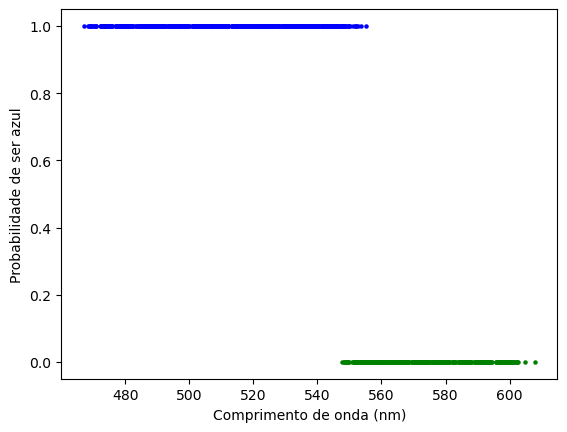

In [26]:
azul = dados[dados['cor']=='azul']
verde = dados[dados['cor']=='verde']

plt.scatter(azul['comprimento de onda'],azul['cor encoded'],color='blue',s=5)
plt.scatter(verde['comprimento de onda'],verde['cor encoded'],color='green',s=5)
plt.ylabel('Probabilidade de ser azul')
plt.xlabel('Comprimento de onda (nm)')
plt.savefig('imagens/nao linearmente separavel.png')

In [27]:
dados

,comprimento de onda,cor,cor encoded
0,470.00,azul,1.0
1,467.13,azul,1.0
2,469.26,azul,1.0
3,473.39,azul,1.0
4,468.52,azul,1.0
...,...,...,...
995,596.48,verde,0.0
996,598.61,verde,0.0
997,604.74,verde,0.0
998,607.87,verde,0.0


In [28]:
split = StratifiedShuffleSplit(n_splits=1,test_size=.2,random_state=42)

for train_index, test_index in split.split(dados,dados['cor']):
    strat_train_set = dados.loc[train_index]
    strat_test_set = dados.loc[test_index]

In [29]:
strat_train_set

,comprimento de onda,cor,cor encoded
470,529.16,azul,1.0
581,543.61,azul,1.0
971,596.36,verde,0.0
649,556.45,verde,0.0
103,484.40,azul,1.0
...,...,...,...
409,525.22,azul,1.0
119,481.49,azul,1.0
203,504.42,azul,1.0
332,512.20,azul,1.0


In [30]:
x_train, y_train = strat_train_set['comprimento de onda'].values.reshape(-1,1), encoder.fit_transform(strat_train_set['cor'].values.reshape((-1,1))).toarray()
x_test,y_test = strat_test_set['comprimento de onda'].values.reshape(-1,1), encoder.fit_transform(strat_test_set['cor'].values.reshape((-1,1))).toarray()

In [31]:
input = keras.layers.Input(shape=x_train.shape[1:])
normalized_input = normalization_layer(input)
hidden1 = keras.layers.Dense(100,activation='tanh')(normalized_input)
hidden2 = keras.layers.Dense(50,activation='tanh')(hidden1)
outputs = keras.layers.Dense(2,activation='softmax')(hidden2)

MLP = keras.models.Model(inputs=[input],outputs=[outputs])

MLP.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=keras.optimizers.SGD(learning_rate=1.))

In [32]:
MLP.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8318 - loss: 0.2050   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9742 - loss: 0.0573 
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9832 - loss: 0.0490 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.0422 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9913 - loss: 0.0323 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9820 - loss: 0.0487 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9782 - loss: 0.0480 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9674 - loss: 0.0704 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9700 - loss: 0.0526 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9826 - loss: 0.0403 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9834 - loss: 0.0484 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [33]:
Perceptron = criar_Perceptron(x_train,dados)

In [34]:
Perceptron.fit(x_train,y_train,epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step - accuracy: 0.8263 - loss: 0.3943
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.9833 - loss: 0.1221
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - accuracy: 0.9825 - loss: 0.1027
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9798 - loss: 0.0912 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9799 - loss: 0.0785 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9819 - loss: 0.0833 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.9810 - loss: 0.0745
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9835 - loss: 0.0763 
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9813 - loss: 0.0661 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9838 - loss: 0.0618 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 896us/step - accuracy: 0.9841 - loss: 0.0641
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [35]:
np.argmax(Perceptron.predict(x_test),axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0])

In [36]:
resultado = np.argmax(y_test,axis=1)
predito = np.argmax(MLP.predict(x_test),axis=1)


# Calcula a acurácia diretamente
accuracy = np.mean(resultado == predito)
print(f"Acurácia com mlp: {accuracy}")

predito = np.argmax(Perceptron.predict(x_test),axis=1)

accuracy = np.mean(resultado==predito)

print(f'Acurácia do Perceptron: {accuracy}')


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Acurácia com mlp: 0.985
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Acurácia do Perceptron: 0.985


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


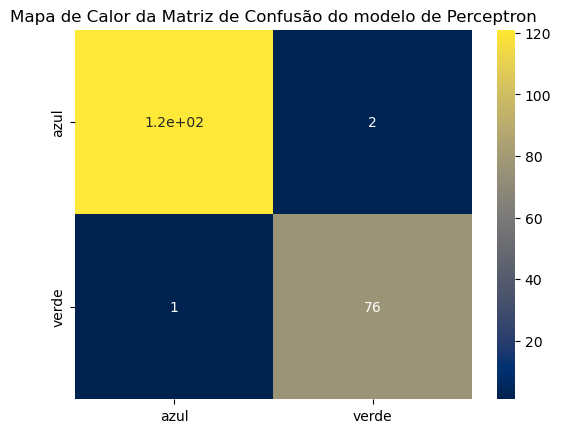

In [37]:
labels = ('azul','verde')
predito = np.argmax(Perceptron.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de Perceptron"
plt.title(title)
plt.savefig(f'imagens/{title}.png')

In [38]:
predito = np.argmax(MLP.predict(x_test),axis=1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


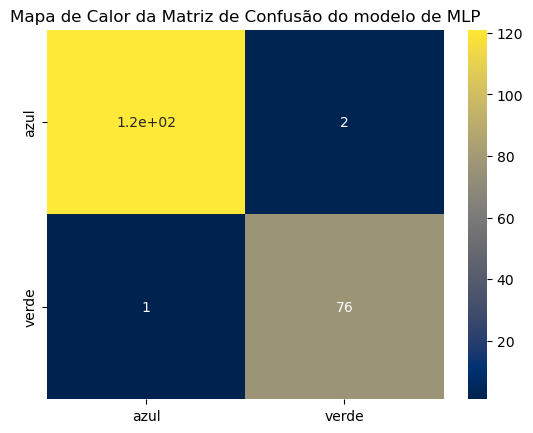

In [39]:
labels = ('azul','verde')
predito = np.argmax(MLP.predict(x_test),axis=1)
sns.heatmap(confusion_matrix(resultado,
                             predito),
                             xticklabels=labels,
                             yticklabels=labels,annot=True,
                             cmap='cividis',
                             )
title = "Mapa de Calor da Matriz de Confusão do modelo de MLP"
plt.title(title)
plt.savefig(f'imagens/{title}.png')